<a href="https://colab.research.google.com/github/vhrique/anne2024/blob/main/01a_Fundamentos_de_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pacotes Utilizados

In [12]:
import torch
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader, TensorDataset

# Dispositivo

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Dispositivo atual: {device}')

Dispositivo atual: cpu


# Variáveis

In [3]:
# Criando variáveis simples no PyTorch como tensores
a = torch.tensor(5)  # Um tensor escalar
b = torch.tensor([1.0, 2.0, 3.0])  # Um tensor de 1D (vetor)

print(f"Variável escalar: {a}")
print(f"Variável vetor: {b}")

Variável escalar: 5
Variável vetor: tensor([1., 2., 3.])


In [4]:
# Também é possível criar variáveis com dimensões mais altas
c = torch.tensor([[1, 2], [3, 4]])  # Um tensor 2D (matriz)

print(f"Variável matriz: \n{c}")

Variável matriz: 
tensor([[1, 2],
        [3, 4]])


In [5]:
# Podemos criar tensores com tipos específicos
d = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)  # Um tensor com precisão em ponto flutuante

print(f"Variável de ponto flutuante: {d}")

Variável de ponto flutuante: tensor([1., 2., 3.])


# Operações

In [6]:
# Operações básicas com tensores
x = torch.tensor([2.0, 3.0, 4.0])
y = torch.tensor([1.0, 5.0, 7.0])

In [8]:
# Soma
soma = x + y
print(f"Soma: {soma}")

# Subtração
subtracao = x - y
print(f"Subtração: {subtracao}")

Soma: tensor([ 3.,  8., 11.])
Subtração: tensor([ 1., -2., -3.])


In [9]:
# Multiplicação
multiplicacao = x * y
print(f"Multiplicação: {multiplicacao}")

# Divisão
divisao = x / y
print(f"Divisão: {divisao}")

Multiplicação: tensor([ 2., 15., 28.])
Divisão: tensor([2.0000, 0.6000, 0.5714])


In [10]:
# Produto escalar
produto_escalar = torch.dot(x, y)
print(f"Produto escalar: {produto_escalar}")

Produto escalar: 45.0


In [11]:
# Funções matemáticas
exp = torch.exp(x)  # Exponencial
print(f"Exponencial: {exp}")

Exponencial: tensor([ 7.3891, 20.0855, 54.5981])


In [69]:
# Criando matrizes (tensores 2D)
A = torch.tensor([[1.0, 2.0], [3.0, 4.0]])  # Matriz 2x2
B = torch.tensor([[5.0, 6.0], [7.0, 8.0]])  # Outra Matriz 2x2

# Multiplicação elemento a elemento (Hadamard product)
elementwise_mult = A * B
print(f"Multiplicação elemento a elemento: \n{elementwise_mult}")

Multiplicação elemento a elemento: 
tensor([[ 5., 12.],
        [21., 32.]])


In [70]:
# Multiplicação de matrizes (produto de matrizes)
matrix_mult = torch.matmul(A, B)
print(f"Multiplicação de matrizes: \n{matrix_mult}")

Multiplicação de matrizes: 
tensor([[19., 22.],
        [43., 50.]])


In [71]:
# Transposição de matriz
A_transpose = torch.transpose(A, 0, 1)
print(f"Transposta da matriz A: \n{A_transpose}")

Transposta da matriz A: 
tensor([[1., 3.],
        [2., 4.]])


In [72]:
# Inversão de uma matriz (usando tensores quadrados invertíveis)
A_inv = torch.inverse(A)
print(f"Inversa da matriz A: \n{A_inv}")

Inversa da matriz A: 
tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]])


In [73]:
# Produto de uma matriz com sua transposta
A_mult_transpose = torch.matmul(A, A_transpose)
print(f"Produto de A com sua transposta: \n{A_mult_transpose}")

Produto de A com sua transposta: 
tensor([[ 5., 11.],
        [11., 25.]])


# Redes Neurais

## Representação

In [22]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.hidden_layer = torch.nn.Linear(input_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.nn.functional.sigmoid(self.hidden_layer(x))
        return torch.nn.functional.sigmoid(self.output_layer(x))


In [62]:
model = MLP(2, 3)

In [63]:
model(torch.Tensor([[0, 0]]))

tensor([[0.4265]], grad_fn=<SigmoidBackward0>)

## Loss e Otimizador

In [65]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Dataset

In [64]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

## Treinamento

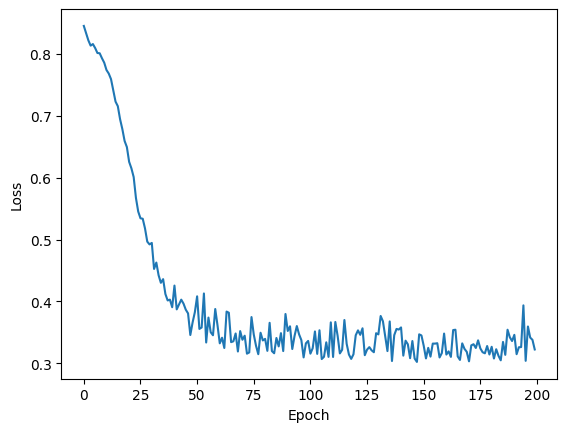

In [66]:
num_epochs = 200
loss_logs = []

for epoch in range(num_epochs):

    # Start epoch loss
    running_loss = 0.0

    for b, (X_batch, y_batch) in enumerate(dataloader):

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

    # Update epoch loss
    loss_logs.append(running_loss/b)

# Plot loss
plt.plot(loss_logs)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## Avaliação

In [67]:
with torch.no_grad():
    outputs = model(X)

print(
    classification_report(
        y.detach().numpy(),
        outputs.detach().numpy() > 0.5
    )
)

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       100
         1.0       0.86      0.84      0.85       100

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

